#**Pembuka**

Assalamu'alaikum warahmatullahi wabarakatuh. Puji syukur kehadirat Allah Subhana Wata'ala atas limpahan Rahmat dan HidayahNya kepada kita semua. Sholawat serta salam senantiasa tercurah limpahkan kepada baginda Muhammad Rasulullah Salallahualaihiwassalam.

Halo para **Pejuang Data**. Selamat berjumpa di pertemuan ketiga Program Training **Algoritma Machine Learning** Kelas Mahir.

#**Model Regresi Linear Sederhana**

Regresi Linear adalah metode untuk mendefinisikan hubungan linear antara variabel dependen Y dan variabel
independen X. Secara sederhana dapat dituliskan dalam formula berikut:





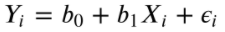

Yang mana adalah variabel dependen, adalah variabel independen, adalah kesalahan acak, disebut sebagai intercept dan disebut sebagai koefisien regresi yang dapat diestimasi berdasarkan data dan yang diberikan. Koefisien juga biasa disebut sebagai bias. Tujuan utama dari model ini adalah untuk mengambarkan garis linear dengan kesesuaian terbaik(best fit) antara X dan Y yang mengestimasi hubungan antara X dan Y.


Lalu bagaimana untuk mengestimasi koefisien tersebut? Salah satu pendekatan yang dapat dilakukan adalah mengunakan metode **Ordinary Least Mean Square Method**. Pada python notebook ini, kita akan mengimplementasikan metode Ordinary Least Mean Square Method.

#**Ordinary Least Mean Square**

Sebelumnya kita telah membahas tentang estimasi hubungan antara X dan Y pada sebuah garis. Misalnya, kita sediakan input dan output sampel, kemudian kita memplot titik titik data ini pada grafik 2 dimensi, maka akan dihasilkan grafik seperti di bawah ini:



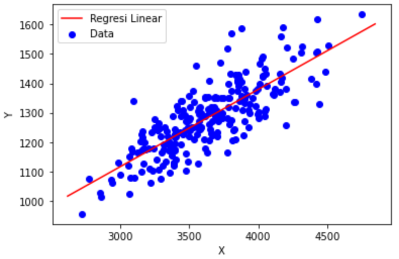

Garis merah pada grafik adalah hubungan sesungguhnya yang ingin disetimasi. Kita berusaha untuk
meminimalkan kesalahan model yang kita bangun. Garis ini adalah garis yang paling tepat menggambarkan
hubungan antara data X dan Y dengan melewati sebagian besar titik data dan memiliki kesalahan yang paling
minimal. Kesalahan ini berupa jarak titik data ke garis estimasi model ini. Secara konseptual kesalahan ini
diilustrasikan pada gambar di bawah ini.

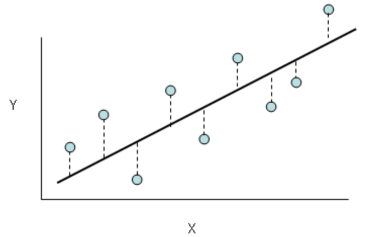

Dan kesalahan total model linier adalah jumlah kesalahan dari setiap titiknya, yaitu:

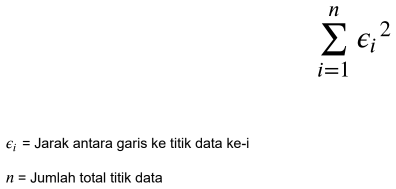

Formula di atas diperoleh dari:

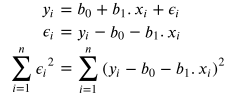

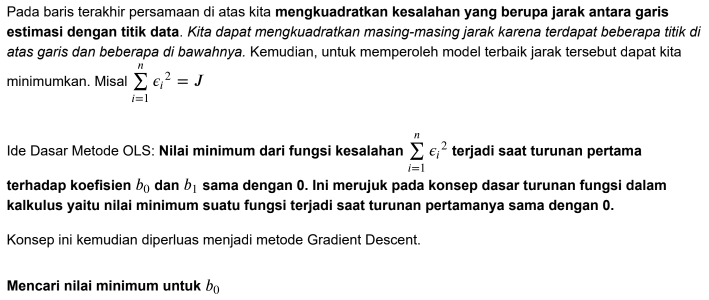

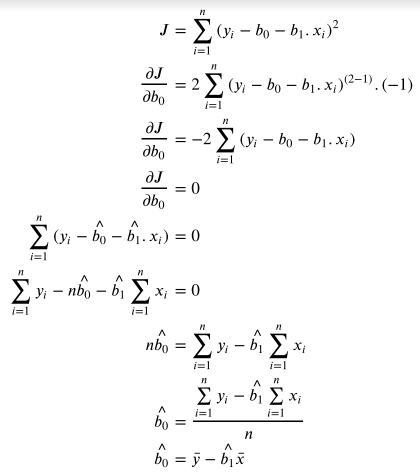

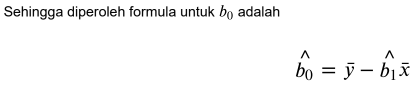

81.png

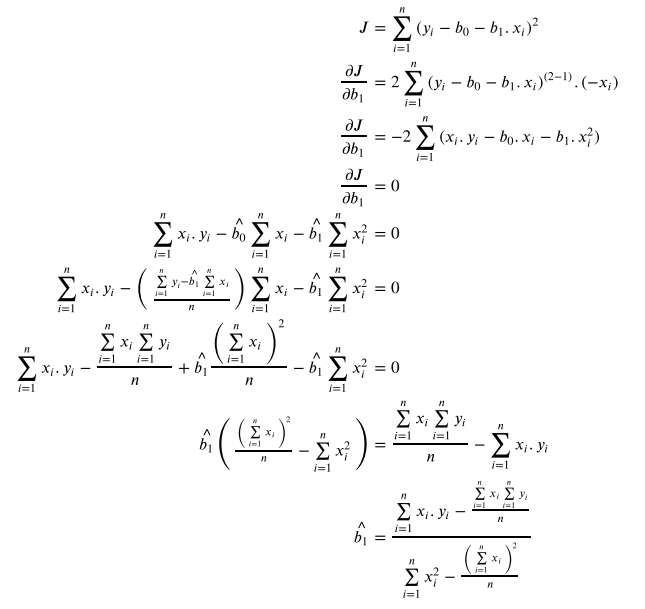

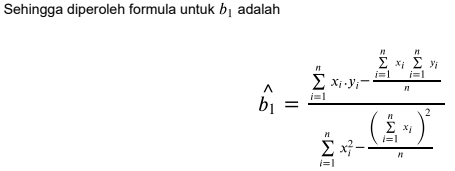

Persamaan terakhir bisa ditulis ulang untuk kemudahan pemrograman sebagai berikut:

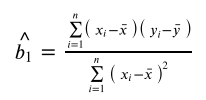

Setelah mendapatkan keduanya, kita dapat mulai melakukan implementasi pada python.

#**Contoh Perhitungan Manual Regresi Linear dengan OLS**

Diketahui data X dan Y adalah sebagai berikut(Y=2X-1):

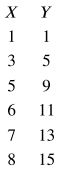

Berikut adalah proses menghitung model Regresi Linear dari data di atas:

**1. Menghitung rata-rata X dan Y**

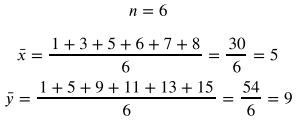

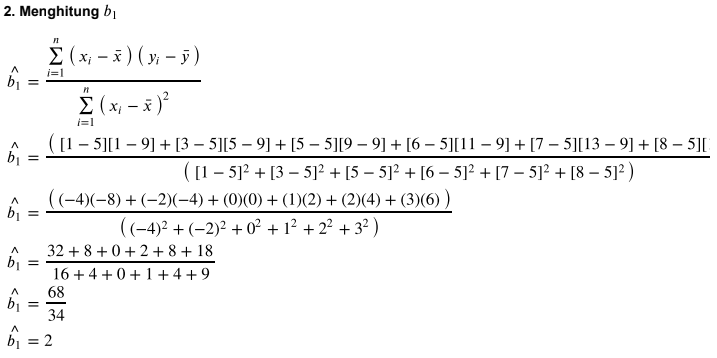

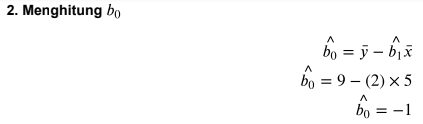

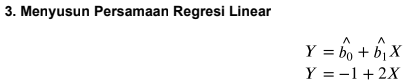

#**Regresi Linear Python From Scratch**

##**Membangun Model Regresi Linear**

Pertama, import library python yang dibutuhkan yaitu:



*   Numpy
*   Pandas
*   Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

Untuk memahami konsep, kita akan menggunakan data X dan Y seperti yang kita tunjukkan pada proses
penghitungan manual.

In [2]:
X_train=np.array([1, 3, 5, 6, 7, 8])
y_train=np.array([1, 5, 9, 11, 13, 15])

In [6]:
# Proses Training Model

# Menghitung rata-rata inputs and outputs

x_rata2 = np.mean(X_train)
print("Rata-rata X:", x_rata2)
y_rata2 = np.mean(y_train)
print("Rata-rata Y:", y_rata2)

# Jumlah data
n = len(X_train)
print("Jumlah data(n):", y_rata2)

# Menuliskan formula untuk menghitung beta 0 dan beta 1
A = 0
B = 0
for i in range(n):
    a = (X_train[i] - x_rata2) * (y_train[i] - y_rata2)
    print("(",X_train[i], "-", x_rata2, ")", "*", "(", y_train[i], "-", y_rata2, ") =", a )
    A += a
    b = (X_train[i] - x_rata2) ** 2
    print("(", X_train[i], "-", x_rata2, ")", "^2", " =", b )
    B += b

print("Pembilang =", A)
print("Penyebut =", B)

# Menampilkan Koefisien Regresi Linear

b_1 = A / B
print("b_1 =", b_1)
b_0 = y_rata2 - (b_1 * x_rata2)
print("b_0 =", b_0)

Rata-rata X: 5.0
Rata-rata Y: 9.0
Jumlah data(n): 9.0
( 1 - 5.0 ) * ( 1 - 9.0 ) = 32.0
( 1 - 5.0 ) ^2  = 16.0
( 3 - 5.0 ) * ( 5 - 9.0 ) = 8.0
( 3 - 5.0 ) ^2  = 4.0
( 5 - 5.0 ) * ( 9 - 9.0 ) = 0.0
( 5 - 5.0 ) ^2  = 0.0
( 6 - 5.0 ) * ( 11 - 9.0 ) = 2.0
( 6 - 5.0 ) ^2  = 1.0
( 7 - 5.0 ) * ( 13 - 9.0 ) = 8.0
( 7 - 5.0 ) ^2  = 4.0
( 8 - 5.0 ) * ( 15 - 9.0 ) = 18.0
( 8 - 5.0 ) ^2  = 9.0
Pembilang = 68.0
Penyebut = 34.0
b_1 = 2.0
b_0 = -1.0


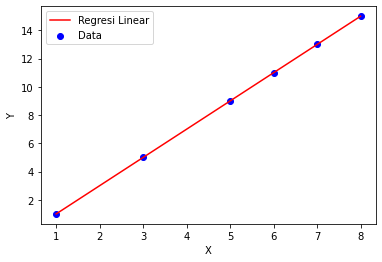

In [7]:
# Plot Nilai Data
x_max = np.max(X_train)
x_min = np.min(X_train)

# Garis Regresi
x = np.linspace(x_min, x_max, 1000)
y = b_0 + b_1 * x

# Plott Garis Regresi
plt.plot(x, y, color='red', label='Regresi Linear')

# Plot Titik Data
plt.scatter(X_train, y_train, color='blue', label='Data')

# Label sumbu
plt.xlabel('X')

# Label sumbu y
plt.ylabel('Y')

# Menampilkan Legenda
plt.legend()

# Menampilkan Gambar Hasil Plot
plt.show()

##**Implementasi Model Regresi Linear Pada Data Real**
Kita akan menggunakan dataset yang berisi **Tinggi Badan (m) dan Berat Badan (kg)**

In [15]:
dataset = pd.read_csv('https://raw.githubusercontent.com/rofifahzaki/Kelas-Mahir/main/data.csv')
# Melihat ukuran dataset
print(dataset.shape)
# Menampilkan 5 data teratas
dataset.head()

(15, 2)


,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


Mencari hubungan antara x (Tinggi Badan) dan y (Berat Badan)

In [16]:
# Definisikan Variabel Input(X) dan Output(Y)
X = dataset['Height'].values.reshape(-1,1)
Y = dataset['Weight'].values.reshape(-1,1)

In [17]:
# Membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [18]:
# Proses Training Model

# Menghitung rata-rata inputs and outputs
x_rata2 = np.mean(X_train)
y_rata2 = np.mean(y_train)

# Jumlah data
n = len(X_train)
# Menuliskan formula untuk menghitung beta 0 dan beta 1
A = 0
B = 0
for i in range(n):
    A += (X_train[i] - x_rata2) * (y_train[i] - y_rata2)
    B += (X_train[i] - x_rata2) ** 2

b_1 = A / B
b_0 = y_rata2 - (b_1 * x_rata2)

# Menampilkan Koefisien Regresi Linear
print(b_0, b_1)

[-39.25676962] [61.45820729]


Dalam notasi matematika, hasil ini dapat ditulis sebagai berikut:

Dalam notasi matematika, hasil ini dapat ditulis sebagai berikut:

**Weight = -39.25676962 + 61.45820729 x Height**

Sekarang kita memiliki model linier. Mari kita plot secara grafis.

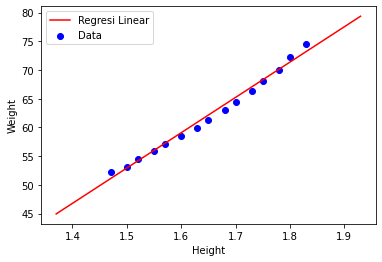

In [28]:
# Plot Nilai Data
x_max = np.max(X) + 0.1
x_min = np.min(X) - 0.1

# Garis Regresi
x = np.linspace(x_min, x_max, 10)
y = b_0 + b_1 * x

# Plott Garis Regresi
plt.plot(x, y, color='red', label='Regresi Linear')

# Plot Titik Data
plt.scatter(X, Y, color='blue', label='Data')

# Label sumbu
plt.xlabel('Height')

# Label sumbu y
plt.ylabel('Weight')

# Menampilkan Legenda
plt.legend()

# Menampilkan Gambar Hasil Plot
plt.show()

### Evaluasi Model

Kita perlu mengukur tingkat ketepatan(akurasi) model yang telah diperoleh. Terdapat banyak metode untuk
melakukan hal ini, namun pada artikel ini kita memilih menggunakan Root Mean Square Error dan Koefisien
Determinasi (R^2 Skor)

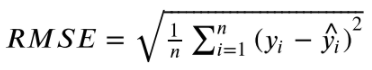

y_i adalah nilai hasil prediksi ke-i. Berikut adalah penulisan kode untuk RMSE

In [30]:
rmse = 0
for i in range(len(X_test)):
    y_pred = b_0 + b_1 *X_test[i]
    rmse += (y_test[i] - y_pred) ** 2

rmse = np.sqrt (rmse/n)
print(rmse)

[0.38686032]


Selanjutnya, mari kita hitung nilai R^2 skor untuk mengukur tingkat akurasi dari model linear yang diperoleh,
secara matematis R^2 dituliskan sebagai berikut:

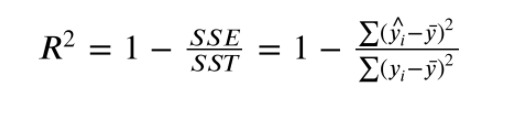

SSE adalah jumlah kuadrat galat sedangkan SST jumlah kuadrat total.

R^2 skor biasanya memiliki nilai antara 0 hingga 1. Nilai ini juga bisa bernilai negatif jika model regresi benar-
benar salah. Di bawah ini adalah kode pemrograman untuk menghitung R^2 skor

In [32]:
SST = 0
SSE = 0
y_pred= b_0 + b_1*X_test
y_rata2 = np.mean(y_test)
for i in range(len(X_test)):
    SST += (y_test[i] - y_rata2) ** 2
    SSE += (y_test[i] - y_pred[i]) **2

score = 1- (SSE/SST)
print("Koefisien Determinasi:", score)

Koefisien Determinasi: [0.96552664]
